# Demonstrating the Lazy Reaction Module

Imports and data.

In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
print('load data')
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)
reactions = dg.collection.ReactionCollection([dg.reaction.LazyReaction(r.template, id=r.id) for r in reactions])

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/out/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

load data


Instantiate library designer.

In [2]:
from dgym.envs.library_designer import LibraryDesigner, Generator

designer = LibraryDesigner(
    reactions = reactions,
    generator = Generator(building_blocks, fingerprints)
)

Design!

CPU times: user 2.1 s, sys: 138 ms, total: 2.24 s
Wall time: 2.43 s


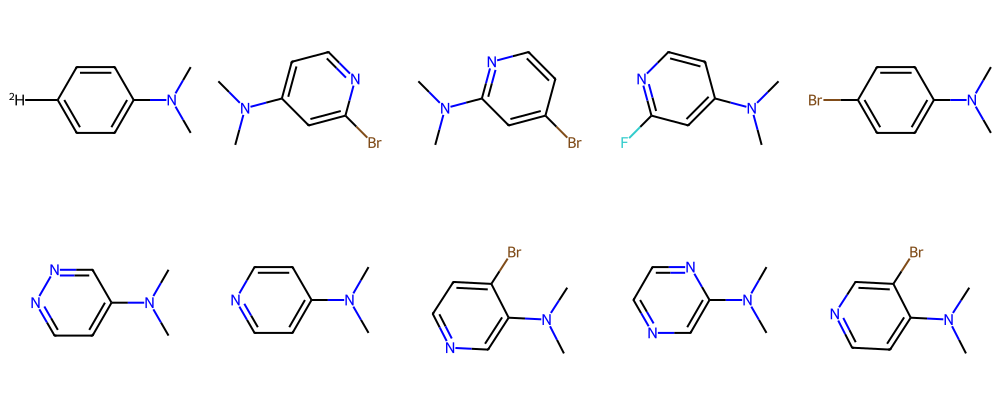

In [3]:
%%time
products = designer.design(deck[7], size=10, temperature=0.0, mode='analog')

from rdkit.Chem.Draw import MolsToGridImage
MolsToGridImage([p.mol for p in products], molsPerRow=5)